In [31]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [32]:
dataW = pd.read_csv (r'dataW.csv')

In [33]:
dataW

,Country Name,Year,Energy Production Quad BTU,GDP
0,Afghanistan,1980,0.072561,3.641723e+09
1,Algeria,1980,2.803017,4.234638e+10
2,Angola,1980,0.335098,5.930503e+09
3,Argentina,1980,1.597946,7.696192e+10
4,Australia,1980,3.722297,1.499840e+11
...,...,...,...,...
5952,Uzbekistan,2021,1.983724,6.923890e+10
5953,Vanuatu,2021,0.000116,9.563327e+08
5954,Vietnam,2021,2.713688,3.661380e+11
5955,Zambia,2021,0.170076,2.214763e+10


In [34]:
dataW.dtypes

Country Name                   object
Year                            int64
Energy Production Quad BTU    float64
GDP                           float64
dtype: object

In [35]:
from sklearn.linear_model import LinearRegression

In [36]:
X = dataW.iloc[:,3].values.reshape(-1,1) #GDP will be X to use predict the Y Energy Production

In [37]:
X

array([[3.64172332e+09],
       [4.23463808e+10],
       [5.93050340e+09],
       ...,
       [3.66138000e+11],
       [2.21476347e+10],
       [2.83712387e+10]])

In [38]:
X.shape

(5957, 1)

In [39]:
Y = dataW.iloc[:,2].values.reshape(-1,1) 

In [40]:
Y

array([[0.07256116],
       [2.80301736],
       [0.33509804],
       ...,
       [2.7136884 ],
       [0.17007611],
       [0.11629721]])

In [41]:
Y.shape

(5957, 1)

Text(0, 0.5, 'Energy Production Quad BTU')

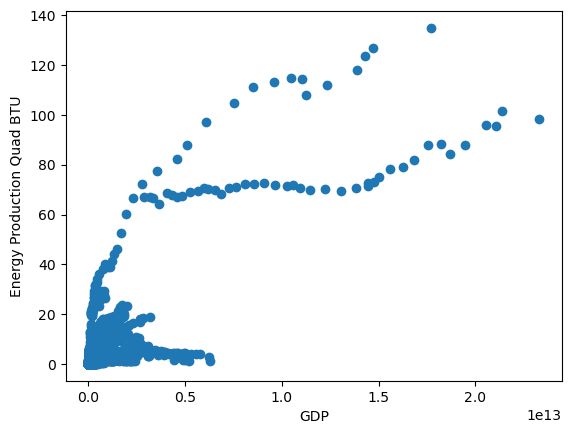

In [42]:
plt.scatter(X,Y)
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [43]:

lr = LinearRegression()
modelLR = lr.fit(X,Y)

In [44]:
yPredLR = modelLR.predict(X)

In [45]:
scoreLR = modelLR.score(X,Y)

In [46]:
scoreLR

0.6553141113134722

In [47]:
import math
rLR = math.sqrt(scoreLR)
rLR

0.8095147381694

Text(0, 0.5, 'Energy Production Quad BTU')

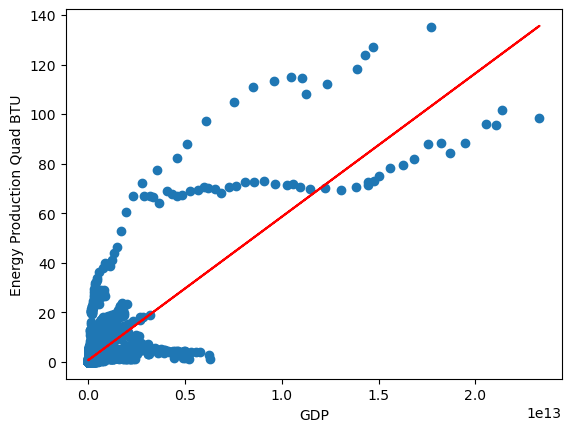

In [48]:
plt.scatter(X,Y)
plt.plot(X,yPredLR,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')

In [49]:
#Training model

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=.25,random_state = 4444 )

In [52]:
X,Y

(array([[3.64172332e+09],
        [4.23463808e+10],
        [5.93050340e+09],
        ...,
        [3.66138000e+11],
        [2.21476347e+10],
        [2.83712387e+10]]),
 array([[0.07256116],
        [2.80301736],
        [0.33509804],
        ...,
        [2.7136884 ],
        [0.17007611],
        [0.11629721]]))

In [53]:
print('X Train: \n',X_train)
print('Y Train: \n',Y_train)
print('X Test: \n',X_test)
print('Y Test: \n',Y_test)

X Train: 
 [[1.29188557e+10]
 [6.28191766e+09]
 [3.78230000e+10]
 ...
 [1.72268492e+10]
 [6.35966548e+10]
 [1.65021000e+11]]
Y Train: 
 [[1.90287557e+00]
 [5.26817200e-03]
 [2.16325146e+00]
 ...
 [1.40786995e-01]
 [3.02024902e+00]
 [7.49824078e+00]]
X Test: 
 [[2.70809000e+11]
 [1.26669000e+11]
 [3.29353329e+09]
 ...
 [5.87799625e+09]
 [7.55094000e+11]
 [1.47868616e+10]]
Y Test: 
 [[1.49598395e+00]
 [1.13619958e+00]
 [1.95489900e-03]
 ...
 [1.98380000e-03]
 [1.28600309e+01]
 [4.12130850e-02]]


In [54]:
modelLR = lr.fit(X_train,Y_train)
modelLR.score(X_train,Y_train)

0.6677205723156014

In [55]:
Y_train_pred = modelLR.predict(X_train)

In [56]:
Y_train_pred, Y_train

(array([[0.83425875],
        [0.79529804],
        [0.98045317],
        ...,
        [0.8595479 ],
        [1.13175187],
        [1.72714166]]),
 array([[1.90287557e+00],
        [5.26817200e-03],
        [2.16325146e+00],
        ...,
        [1.40786995e-01],
        [3.02024902e+00],
        [7.49824078e+00]]))

In [57]:
Y_test_pred = modelLR.predict(X_test)
Y_test_pred, Y_test

(array([[2.34814734],
        [1.50200449],
        [0.77775537],
        ...,
        [0.7929269 ],
        [5.19103821],
        [0.84522448]]),
 array([[1.49598395e+00],
        [1.13619958e+00],
        [1.95489900e-03],
        ...,
        [1.98380000e-03],
        [1.28600309e+01],
        [4.12130850e-02]]))

In [58]:
modelLR.score(X_test,Y_test)

0.5999294589084099

In [59]:
#~60%

Text(0, 0.5, 'Energy Production Quad BTU')

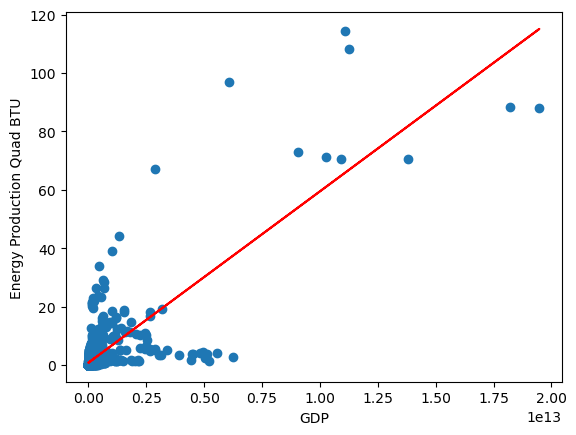

In [60]:
plt.scatter(X_test,Y_test)
plt.plot(X_test,Y_test_pred,color='red')
plt.xlabel('GDP')
plt.ylabel('Energy Production Quad BTU')